# DFT - Diskretna Fourierova transformacija

In [1]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def compute_fft(signal, sample_rate, N):
    length = len(signal)
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sample_rate)

    mask = (freqs >= 0) & (freqs < N)
    fft_result = fft_result[mask]
    freqs = freqs[mask]

    amplitudes = np.abs(fft_result) * 2 / length # normalizacija

    return freqs, amplitudes

In [83]:
def compute_dft_real(signal, sample_rate, N):
    length = len(signal)
    time_points = np.arange(length) / sample_rate
    freq_resolution = sample_rate / length
    max_bin = int(N // freq_resolution) + 1
    freqs = np.arange(max_bin) * freq_resolution
    amplitudes = np.empty(len(freqs))

    for i, freq in enumerate(freqs):
        real_part = np.dot(signal, np.cos(2 * np.pi * freq * time_points))
        imag_part = np.dot(signal, np.sin(2 * np.pi * freq * time_points))
        amplitudes[i] = np.sqrt(real_part**2 + imag_part**2) * 2 / length # normalizacija

    return freqs, amplitudes


In [86]:
def compute_dft_complex(signal, sample_rate, N):
    length = len(signal)
    time_points = np.arange(length) / sample_rate
    freq_resolution = sample_rate / length
    max_bin = int(N // freq_resolution) + 1
    freqs = np.arange(max_bin) * freq_resolution
    amplitudes = np.empty(len(freqs))

    for i, freq in enumerate(freqs):
        basis = np.exp(-2j * np.pi * freq * time_points)
        coeff = np.dot(signal, basis)
        amplitudes[i] = np.abs(coeff) * 2 / length # normalizacija

    return freqs, amplitudes

In [92]:
def get_energy_range(freqs, amplitudes, energy_threshold=0.01):
    energy = amplitudes**2
    total_energy = np.sum(energy)
    energy_ratio = energy / total_energy

    mask_energy = energy_ratio >= energy_threshold
    freqs_filtered = freqs[mask_energy]
    amplitudes_filtered = amplitudes[mask_energy]

    return freqs_filtered, amplitudes_filtered

In [111]:
def make_graphs(freqs, fft_data, dft_real, dft_complex, energy, filename):
    metode = [
        (fft_data, "FFT", 'k'),
        (dft_real, "DFT Real", 'b'),
        (dft_complex, "DFT Complex", 'g'),
    ]

    plt.figure(figsize=(18, 4))
    plt.suptitle(f"Spektralna analiza – {filename}", fontsize=14)

    for i, (amplitude, naslov, barva) in enumerate(metode, start=1):
        ax = plt.subplot(1, 4, i)
        markerline, stemline, baseline = ax.stem(freqs, amplitude, linefmt=barva + '-', markerfmt=barva + 'o', basefmt=" ")
        markerline.set_markersize(5)
        stemline.set_linewidth(0.8)

        ax.set_title(naslov)
        ax.set_xlabel("Frekvenca [Hz]")
        if i == 1:
            ax.set_ylabel("Amplituda")
        ax.grid(True)
        ax.label_outer()

    freqs_filtered, amplitudes_filtered = energy
    ax = plt.subplot(1, 4, 4)
    markerline, stemline, baseline = ax.stem(freqs_filtered, amplitudes_filtered, linefmt='r-', markerfmt='ro',
                                             basefmt=" ")
    markerline.set_markersize(5)
    stemline.set_linewidth(0.8)
    ax.set_title("Frekvence ≥ 1% energije")
    ax.set_xlabel("Frekvenca [Hz]")
    ax.grid(True)
    ax.label_outer()

    plt.show()

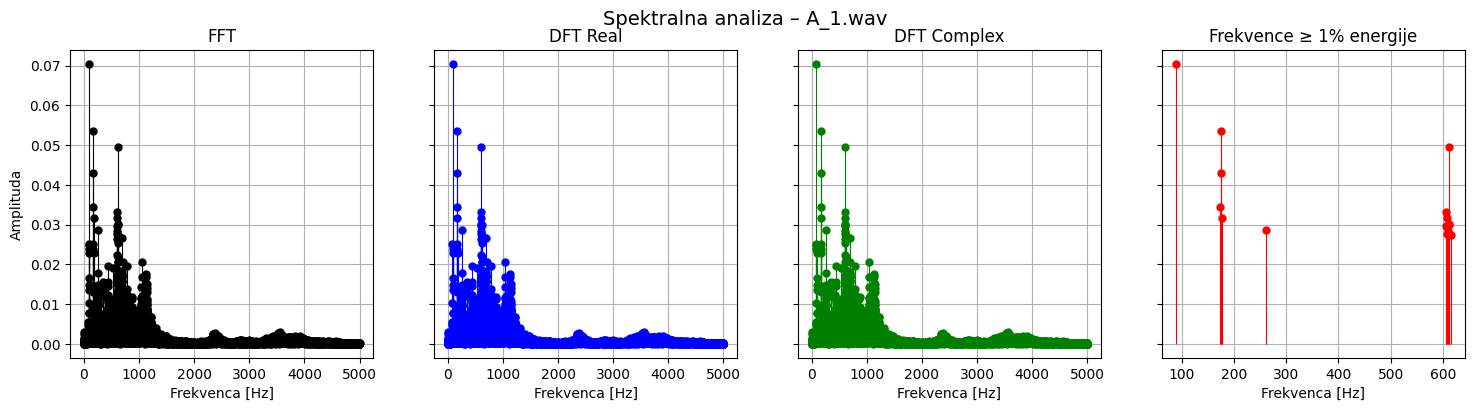

Frekvence z vsaj 1% energije celotnega signala:
87.4 Hz, 173.5 Hz, 174.4 Hz, 174.9 Hz, 176.3 Hz, 261.9 Hz, 606.0 Hz, 607.0 Hz, 607.4 Hz, 608.4 Hz, 609.8 Hz, 611.7 Hz, 612.1 Hz, 612.6 Hz, 616.4 Hz


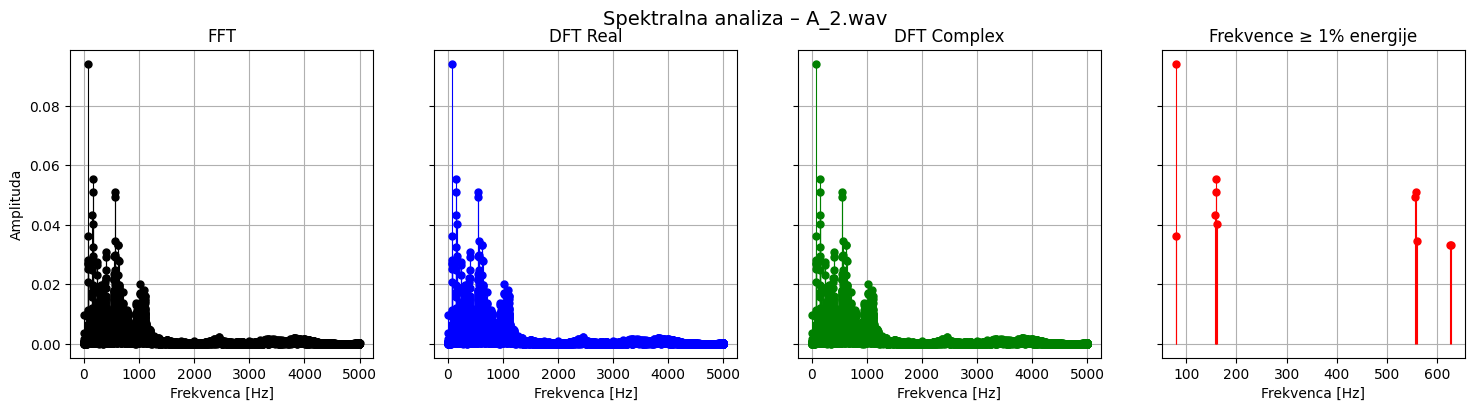

Frekvence z vsaj 1% energije celotnega signala:
78.5 Hz, 79.3 Hz, 157.4 Hz, 158.6 Hz, 159.0 Hz, 160.6 Hz, 556.7 Hz, 557.1 Hz, 559.9 Hz, 626.6 Hz, 628.2 Hz


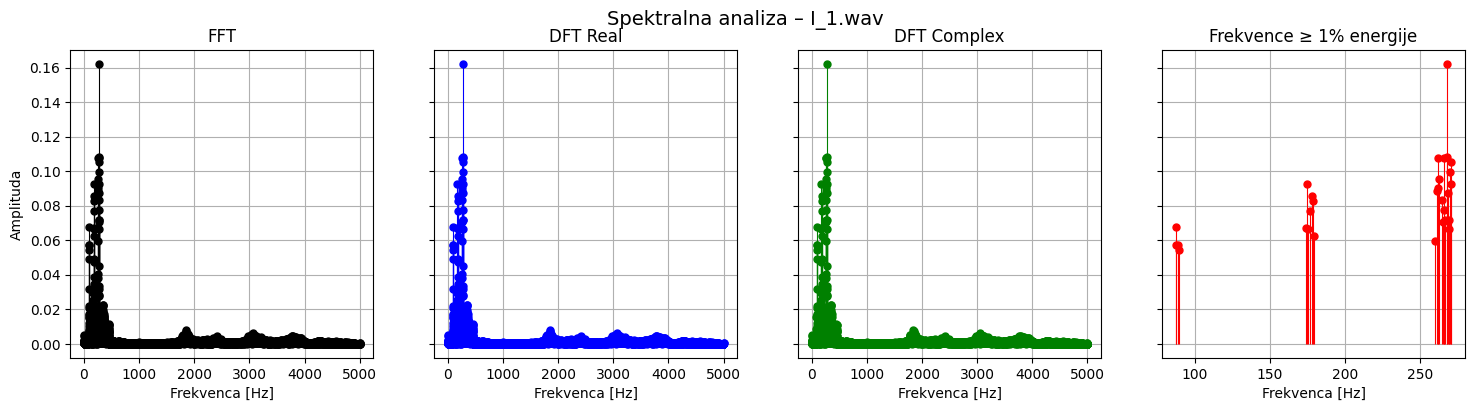

Frekvence z vsaj 1% energije celotnega signala:
87.4 Hz, 87.9 Hz, 88.8 Hz, 89.7 Hz, 174.4 Hz, 174.8 Hz, 175.3 Hz, 177.1 Hz, 178.5 Hz, 179.0 Hz, 179.4 Hz, 260.0 Hz, 261.3 Hz, 261.8 Hz, 262.3 Hz, 262.7 Hz, 264.5 Hz, 265.5 Hz, 265.9 Hz, 266.4 Hz, 266.8 Hz, 267.7 Hz, 268.2 Hz, 268.7 Hz, 269.1 Hz, 269.6 Hz, 270.0 Hz, 270.5 Hz, 270.9 Hz


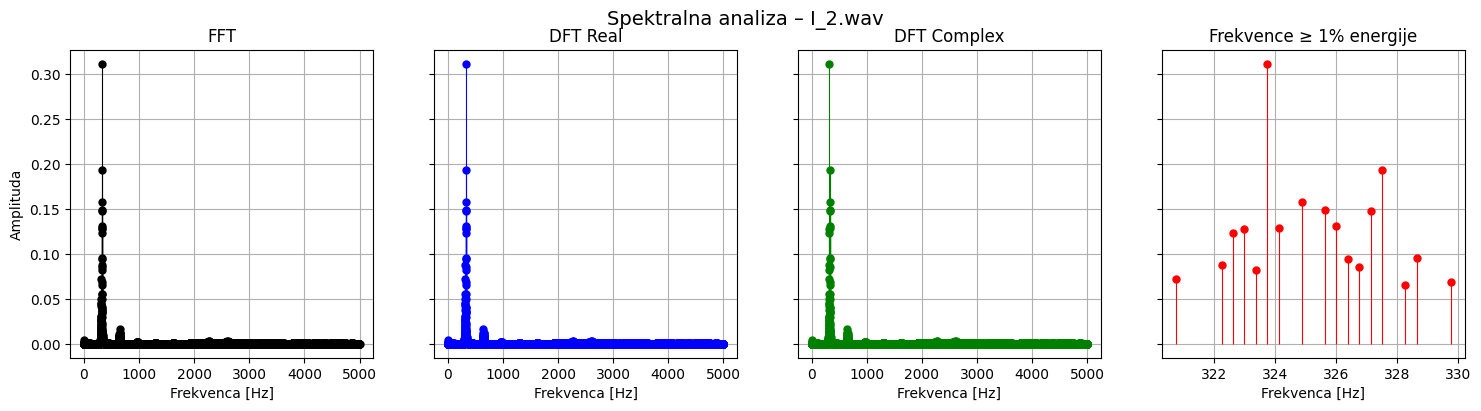

Frekvence z vsaj 1% energije celotnega signala:
320.7 Hz, 322.2 Hz, 322.6 Hz, 323.0 Hz, 323.4 Hz, 323.8 Hz, 324.1 Hz, 324.9 Hz, 325.6 Hz, 326.0 Hz, 326.4 Hz, 326.8 Hz, 327.1 Hz, 327.5 Hz, 328.3 Hz, 328.6 Hz, 329.8 Hz


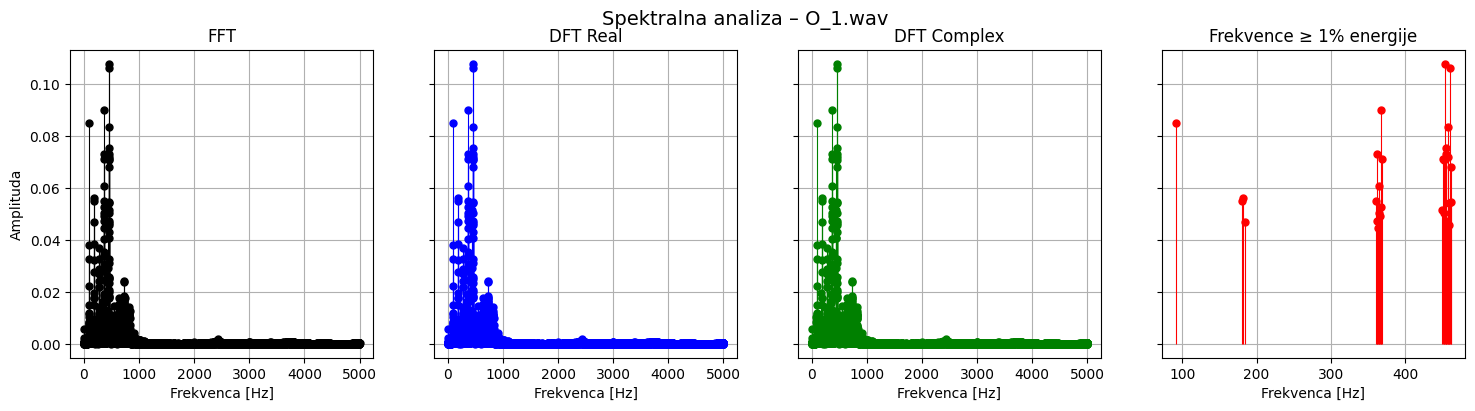

Frekvence z vsaj 1% energije celotnega signala:
91.1 Hz, 181.0 Hz, 182.1 Hz, 183.9 Hz, 360.7 Hz, 361.9 Hz, 362.5 Hz, 363.1 Hz, 364.3 Hz, 364.9 Hz, 366.0 Hz, 367.2 Hz, 367.8 Hz, 369.0 Hz, 448.8 Hz, 450.6 Hz, 451.8 Hz, 452.4 Hz, 453.0 Hz, 454.2 Hz, 454.7 Hz, 455.3 Hz, 455.9 Hz, 457.1 Hz, 457.7 Hz, 458.3 Hz, 459.5 Hz, 460.1 Hz, 461.2 Hz, 461.8 Hz


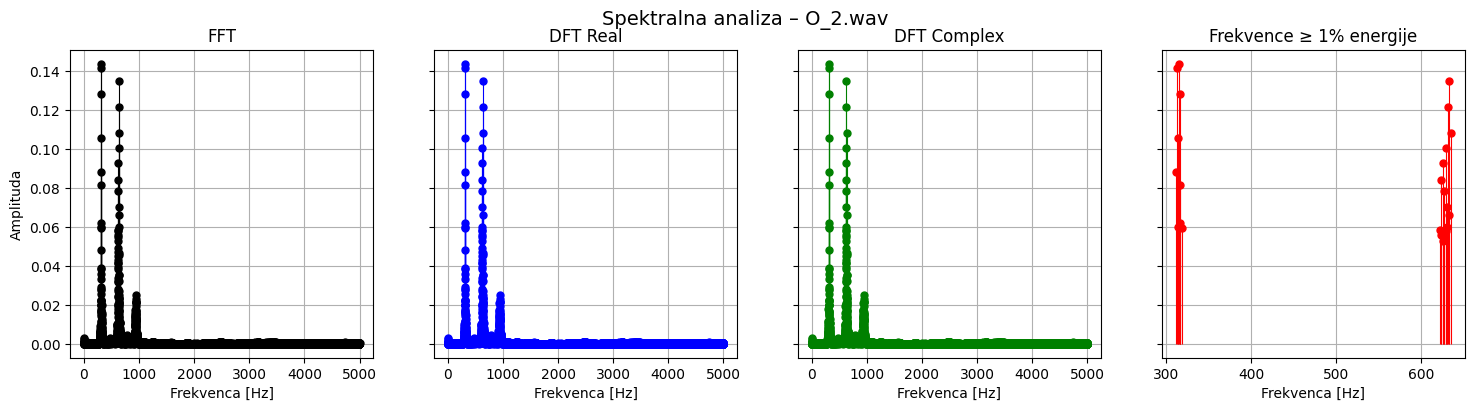

Frekvence z vsaj 1% energije celotnega signala:
311.0 Hz, 312.5 Hz, 313.9 Hz, 314.4 Hz, 315.4 Hz, 315.8 Hz, 316.3 Hz, 316.8 Hz, 318.2 Hz, 622.1 Hz, 623.0 Hz, 623.5 Hz, 625.0 Hz, 625.4 Hz, 626.4 Hz, 626.9 Hz, 628.8 Hz, 629.3 Hz, 629.8 Hz, 630.2 Hz, 631.2 Hz, 632.2 Hz, 632.6 Hz, 635.0 Hz


In [116]:
import os

def analiziraj_posnetke(N=1024):
    folder = 'Audio'
    files = [f for f in os.listdir(folder) if f.lower().endswith('.wav')]
    for filename in files:
        filepath = os.path.join(folder, filename)
        sample_rate, signal = read(filepath)

        y = (signal / np.max(np.abs(signal))).astype(np.float32)

        freqs_fft, fft_data = compute_fft(y, sample_rate, N)
        freqs_real, dft_real = compute_dft_real(y, sample_rate, N)
        freqs_complex, dft_complex = compute_dft_complex(y, sample_rate, N)
        freqs_energy, amplitudes_energy = get_energy_range(freqs_fft, dft_real, 0.01)

        make_graphs(freqs_fft, fft_data, dft_real, dft_complex, (freqs_energy, amplitudes_energy), filename)

        print("Frekvence z vsaj 1% energije celotnega signala:")
        print(", ".join(f"{f:.1f} Hz" for f, a in zip(freqs_energy, amplitudes_energy) if a > 0))

analiziraj_posnetke(5000)

Ali lahko frekvenčno sliko signala nedvoumno določimo preko skalarnega produkta med posnetim signalom in izbrano realno sinusoido? Zakaj?

Ne, skalarni produkt s samo eno realno sinusoido zajame informacijo iz pozitivnih in negativnih frekvenc in je dvoumno -> nemoremo izračunati ven faze in amplitude.


Ali lahko frekvenčno sliko signala nedvoumno določimo preko skalarnega produkta med posnetim signalom in izbrano kompleksno sinusoido? Kako na to vpliva dolžina opazovanega intervala signala? Zakaj?

Da, frekvenčna slika je nedvoumna, ker vsebuje samo pozitivno frekvenco, potrebujemo pa dovolj dolg opazovalni interval, da se posamezne frekvence jasno ločijo. (Heisenbergov princip čas-frekvenca)


Kako so frekvence, ki so prisotne v izgovorjavi samoglasnikov »a«, »i« in »o« odvisne od višine tona izgovorjave?

Spremeni se osnovna frekvenca, Harmonske frekvence se pomaknejo.


Kako se z višino tona izgovorjave spremeni pojav višjih harmonikov v frekvenčni sliki?

Spremenijo se razmiki med harmoni v spektru